In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


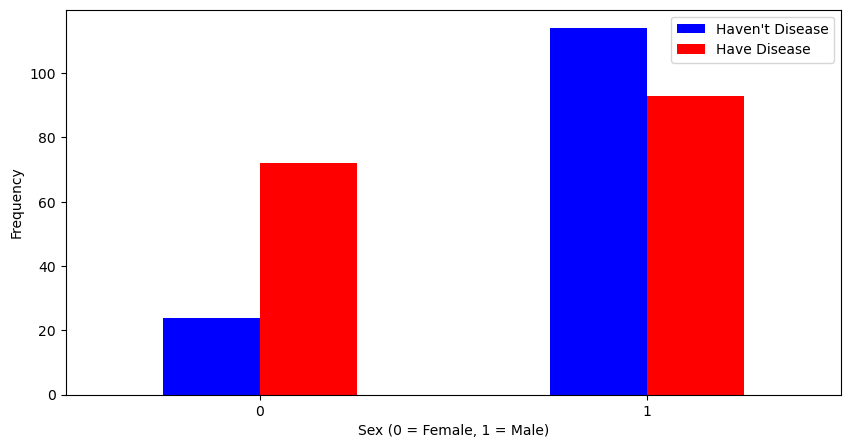

In [7]:
pd.crosstab(data.sex, data.target).plot(kind="bar",figsize=(10,5),color=['blue','red' ])

plt.xlabel('Sex (0 = Female, 1 = Male)') # X-Label

plt.xticks(rotation=0) # Get or set the current tick locations and labels of the x-axis.

plt.legend(["Haven't Disease", "Have Disease"]) # legend = Index

plt.ylabel('Frequency') # X-Label

plt.show() # Help to show our diagram



In [8]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)

IQR = Q3 - Q1

((data < (Q1 - 1.5 * IQR)) | (data < (Q3 - 1.5 * IQR))).sum()

age         19
sex          0
cp           0
trestbps    20
chol        23
fbs          0
restecg      0
thalach     33
exang        0
oldpeak      0
slope       21
ca           0
thal        20
target       0
dtype: int64

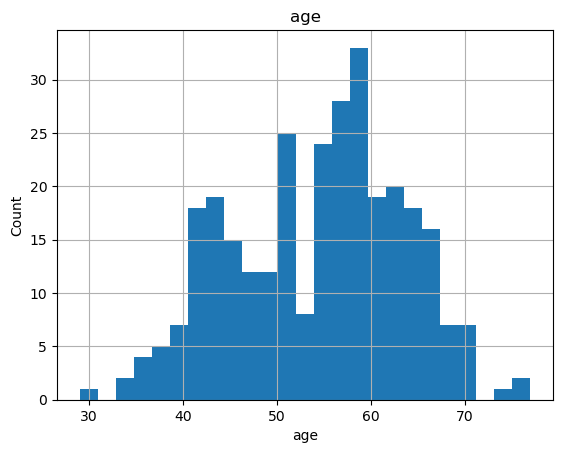

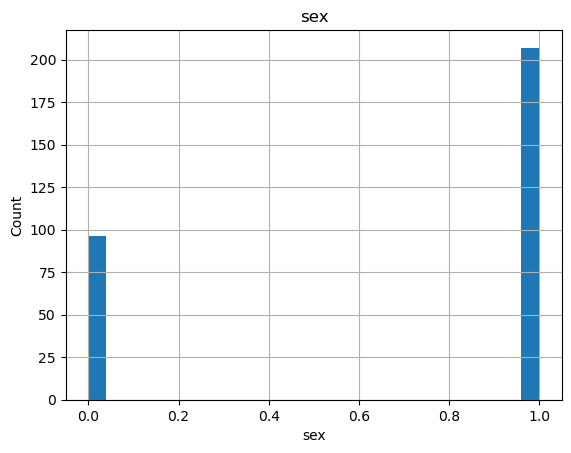

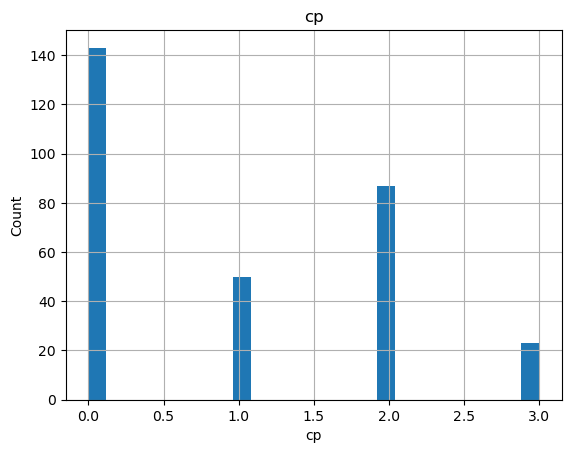

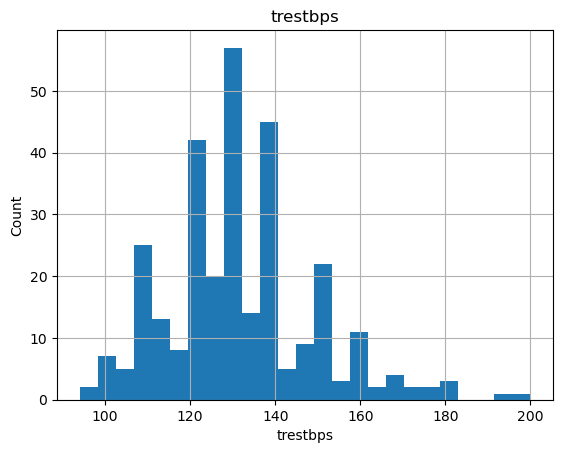

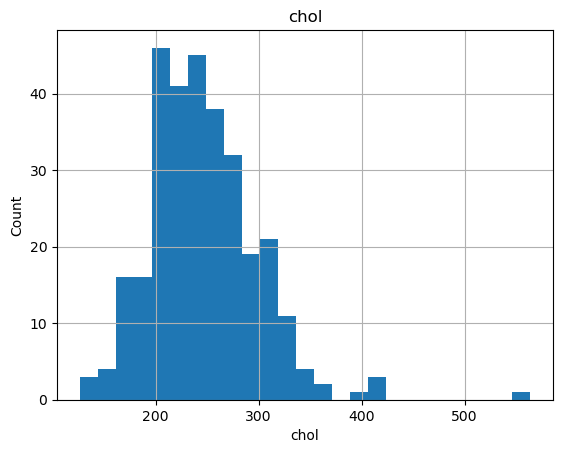

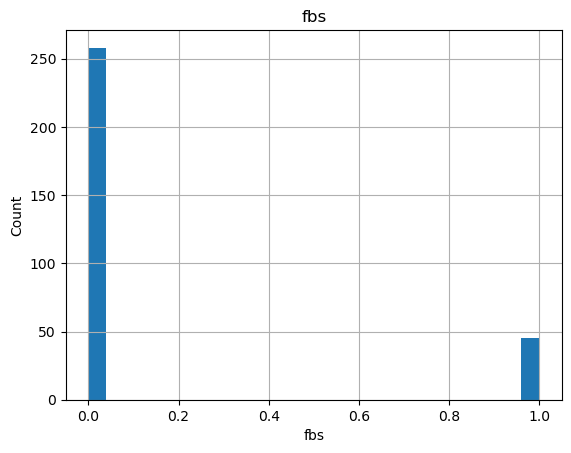

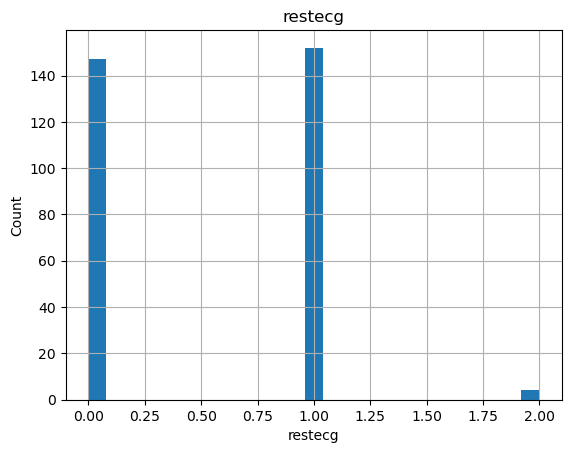

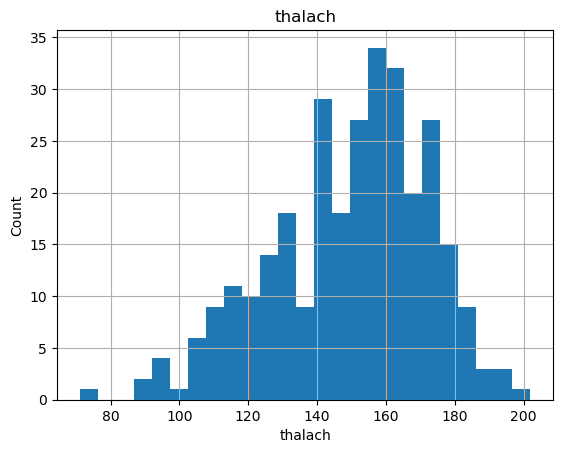

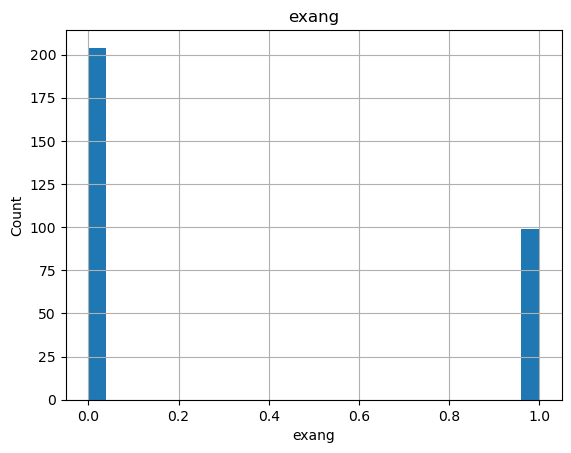

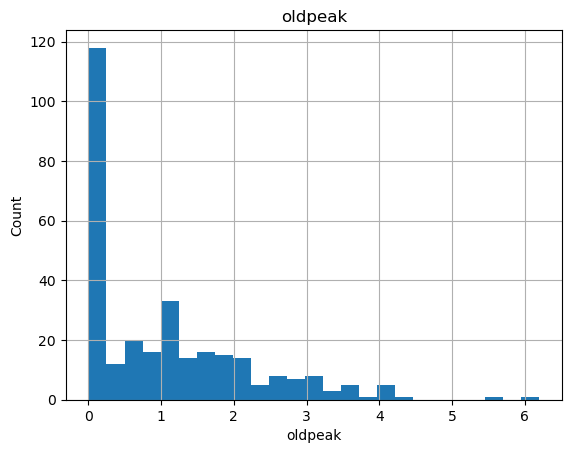

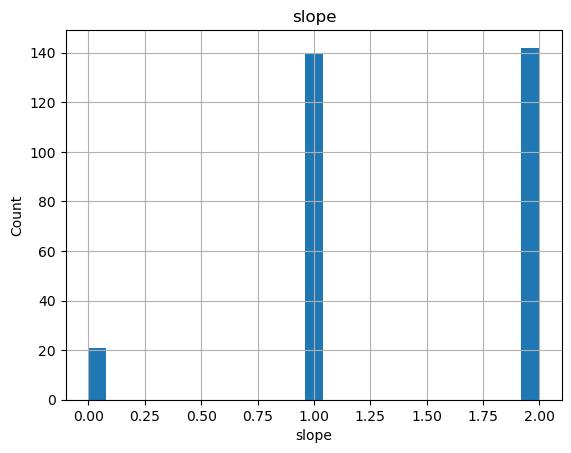

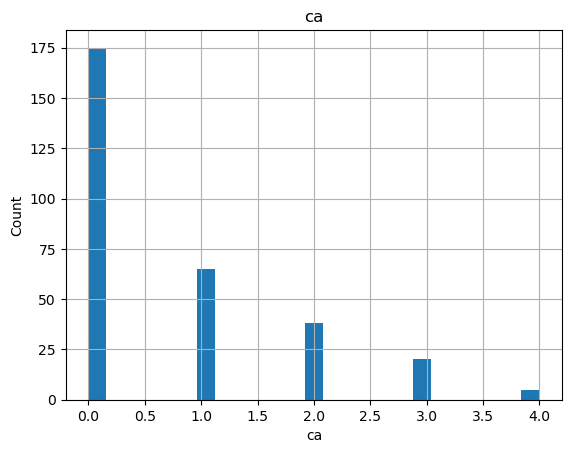

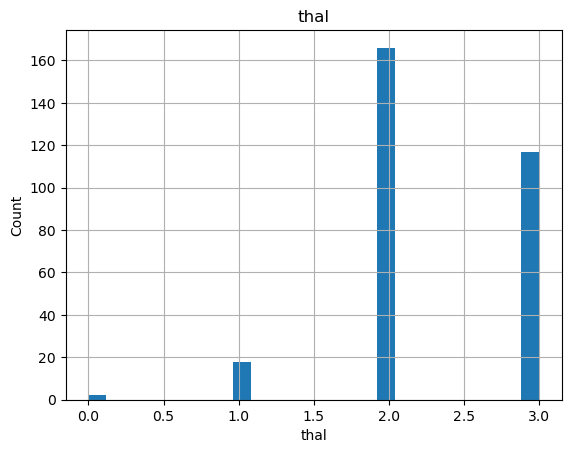

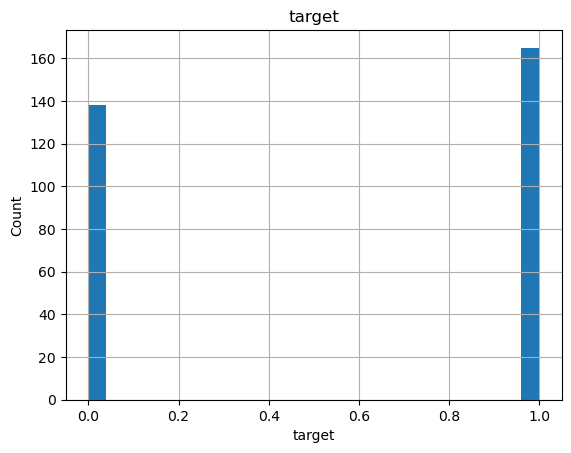

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

for feature in data:
    dataset = data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

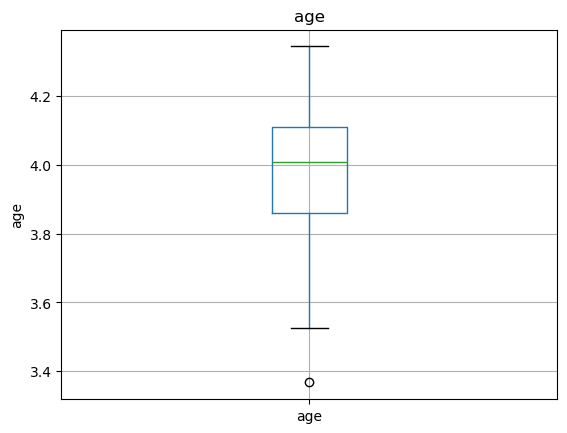

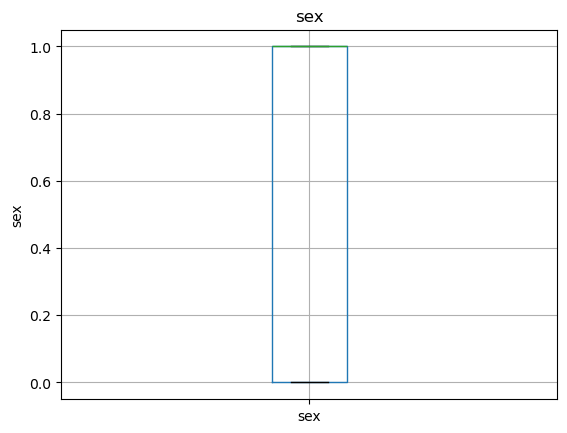

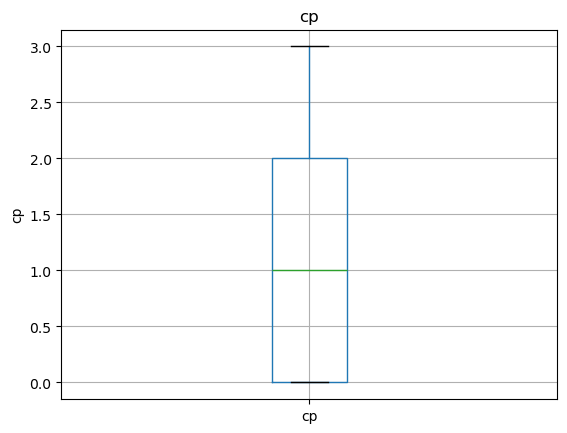

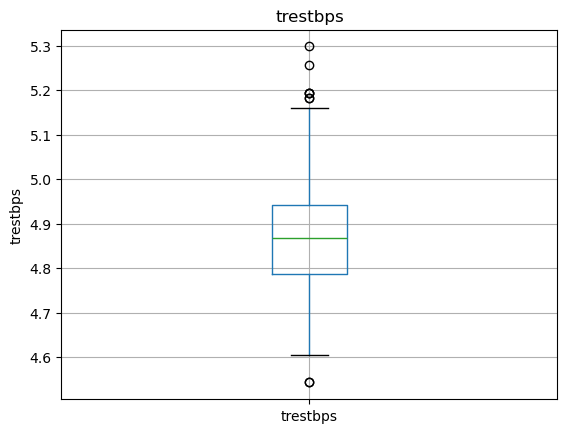

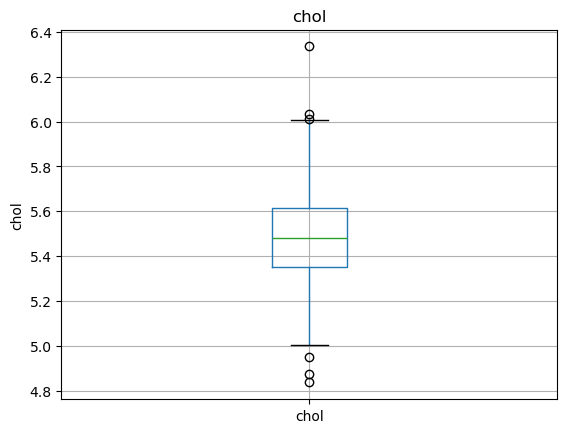

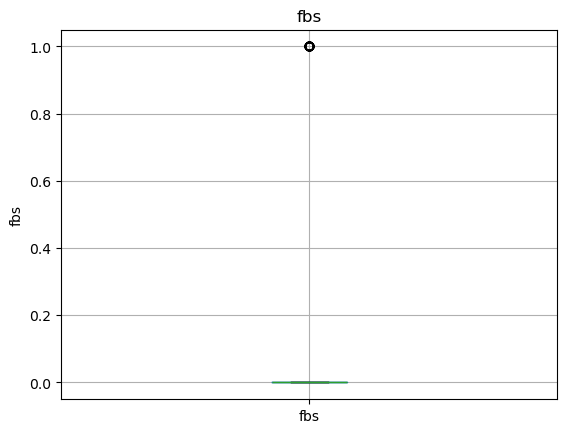

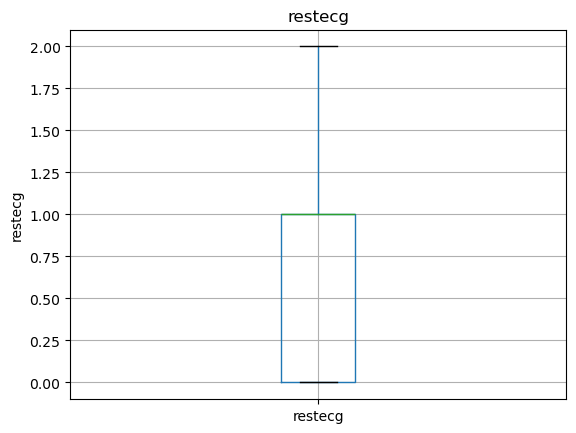

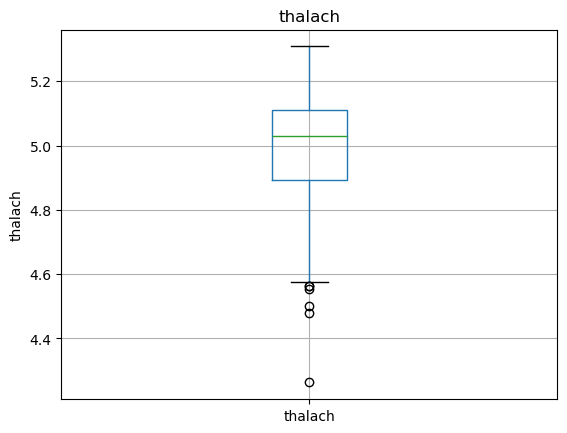

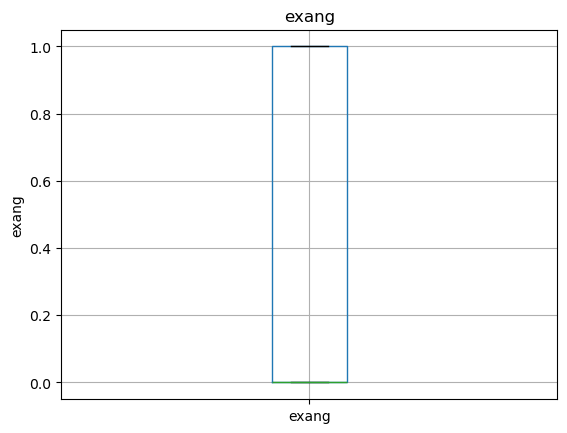

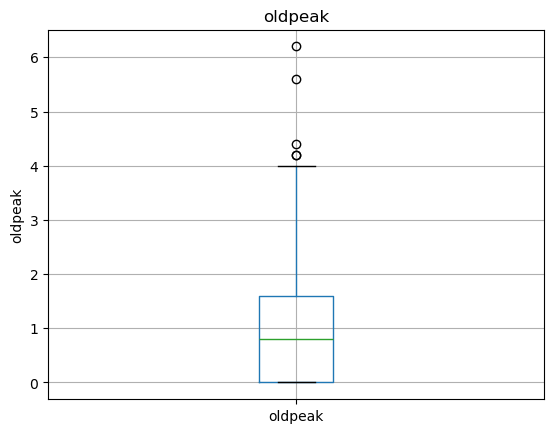

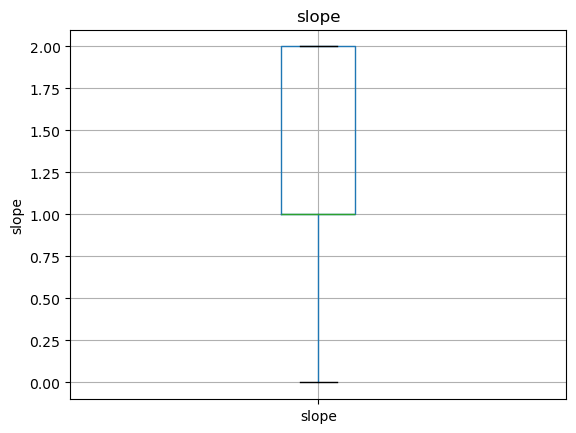

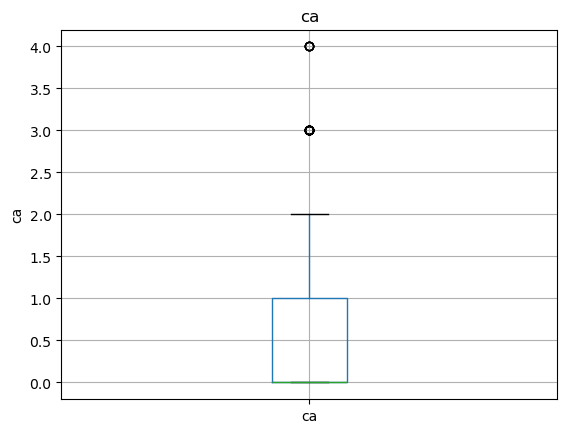

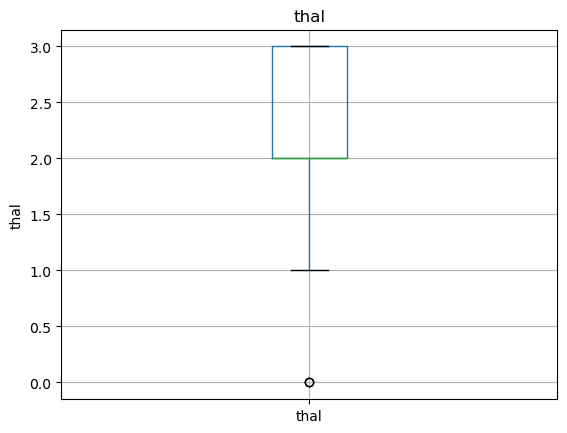

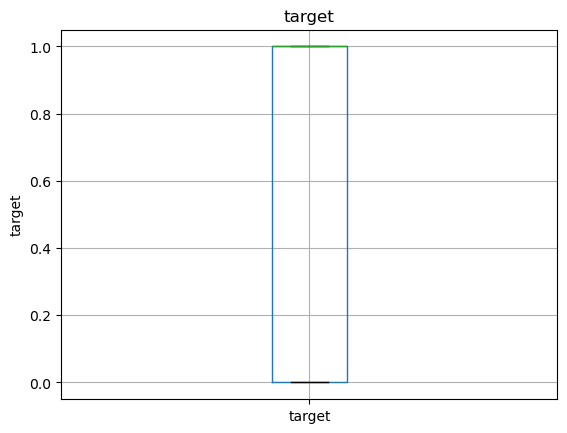

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

for feature in data:
    dataset = data.copy()

    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature] = np.log(dataset[feature])
        
    dataset.boxplot(column=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [19]:
import numpy as np

def detect_outliers(values):
    outliers = []  # Initialize the list inside the function
    threshold = 3
    mean_val = np.mean(values)
    std_val = np.std(values)

    for i in values:
        z_score = (i - mean_val) / std_val
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

out = detect_outliers(data['age'])
out

[]

In [21]:
import numpy as np

outliers = []

def detect_outliers(values):
    threshold = 3
    mean_val = np.mean(values)
    std_val = np.std(values)

    for i in values:
        z_score = (i - mean_val) / std_val
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

out = detect_outliers(data['trestbps'])
out

[200, 192]

In [22]:
import numpy as np

outliers = []

def detect_outliers(values):
    threshold = 3
    mean_val = np.mean(values)
    std_val = np.std(values)

    for i in values:
        z_score = (i - mean_val) / std_val
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

out = detect_outliers(data['chol'])
out

[417, 564, 407, 409]

In [23]:
import numpy as np

outliers = []

def detect_outliers(values):
    threshold = 3
    mean_val = np.mean(values)
    std_val = np.std(values)

    for i in values:
        z_score = (i - mean_val) / std_val
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

out = detect_outliers(data['thalach'])
out

[71]

<Axes: >

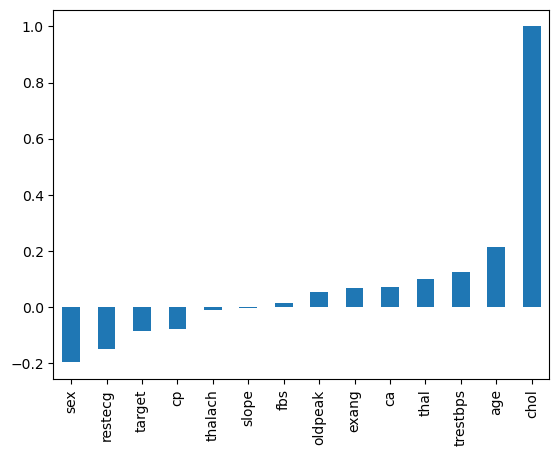

In [24]:
data.corr()['chol'].sort_values().plot(kind='bar')


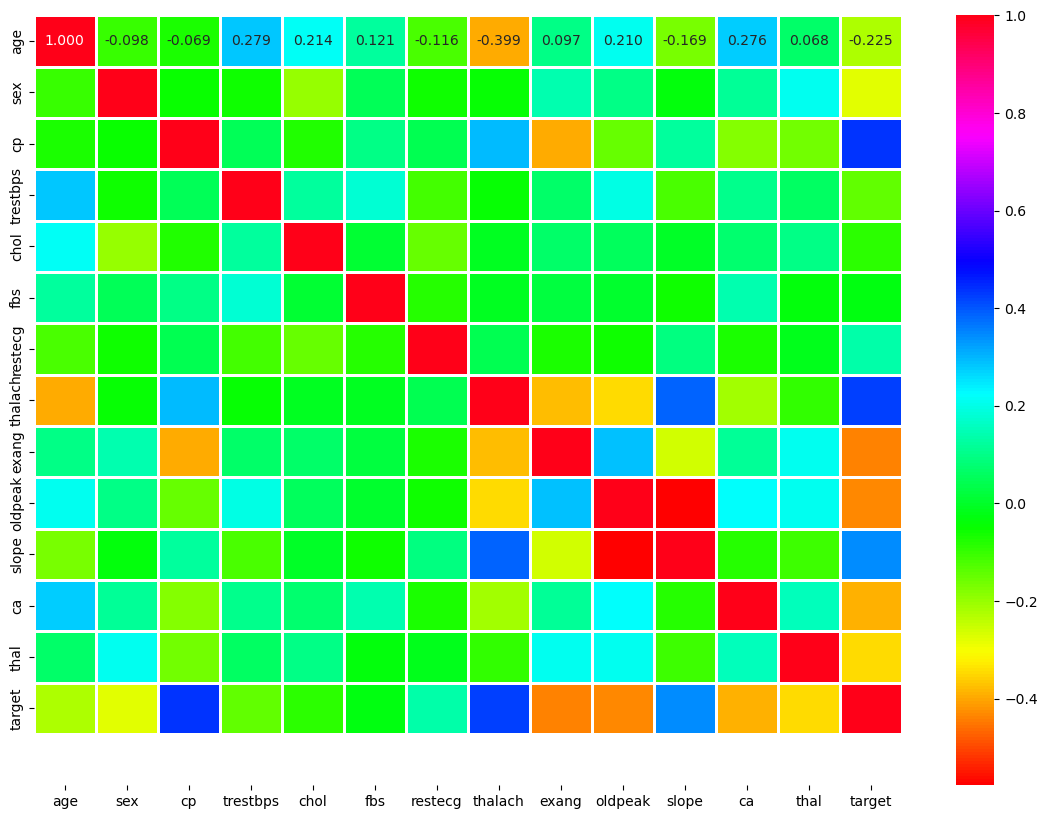

In [25]:
plt.figure(figsize=(14,10)) # Help to set figure size

sns.heatmap(data.corr(),annot=True,cmap='hsv',fmt='.3f',linewidths=2)

plt.ylim(15,0) # show us the exact number of values we want

plt.show()

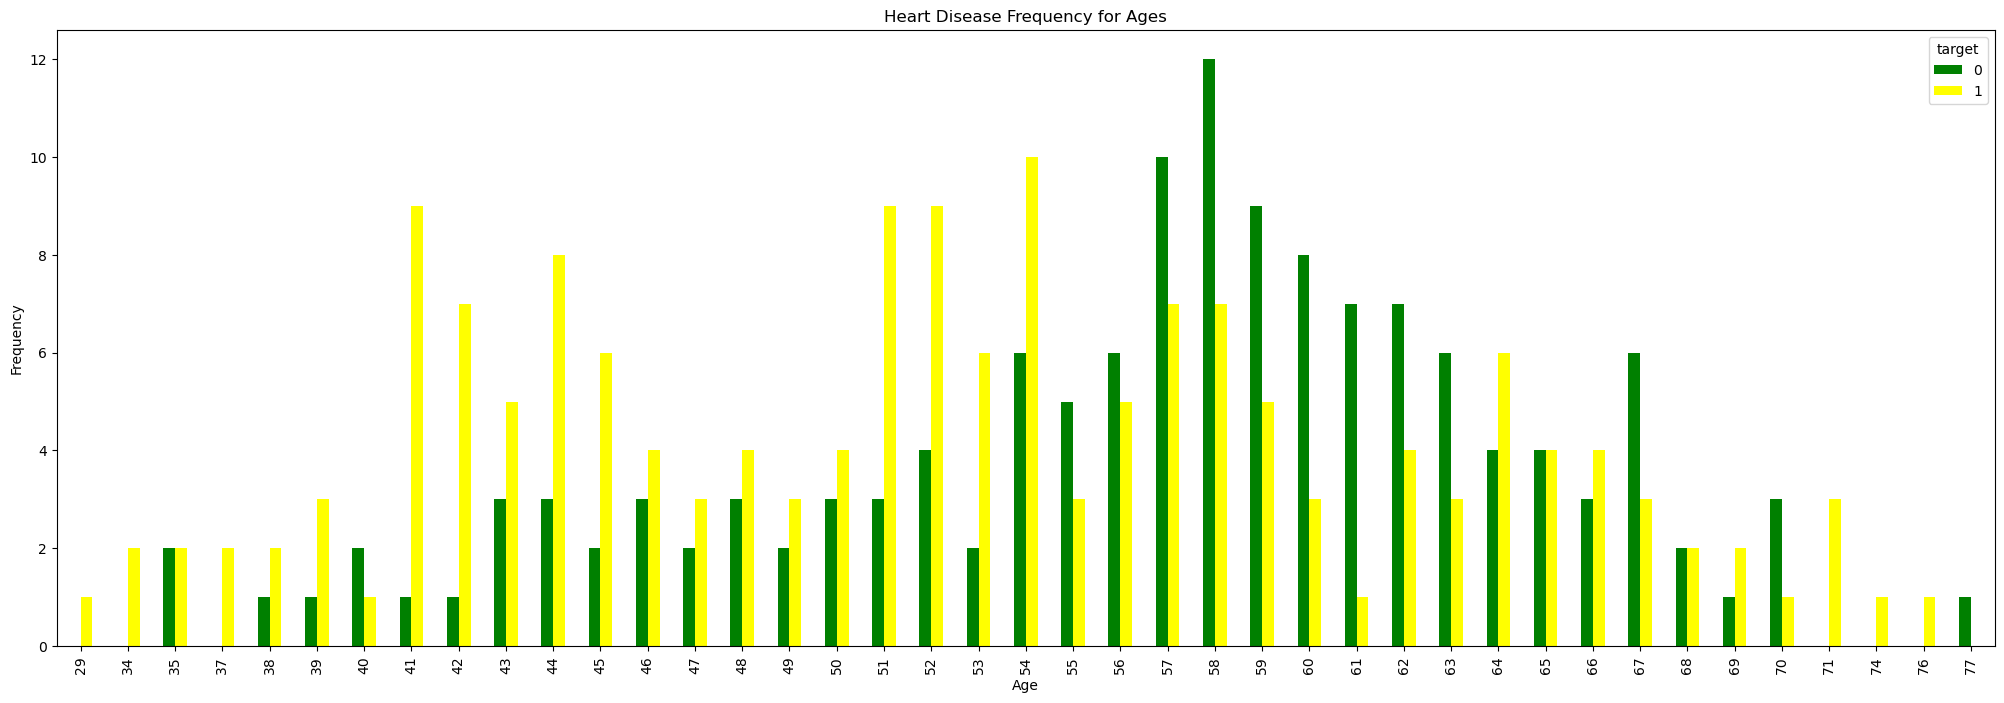

In [26]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(25,8),color=['green','yellow' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1).values
y = data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [28]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train,y_train)

lr_pred = lr_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [30]:
print(confusion_matrix(y_test,lr_pred))

[[25  7]
 [ 1 28]]


In [31]:
from sklearn import svm

clf_model = svm.SVC(kernel='rbf')

clf_model.fit(X_train,y_train)

clf_pred = clf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,clf_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



In [32]:
print(confusion_matrix(y_test,clf_pred))

[[26  6]
 [ 1 28]]


In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)

rf_model.fit(X_train,y_train)

rf_pred = rf_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test,rf_pred))


              precision    recall  f1-score   support

           0       1.00      0.78      0.88        32
           1       0.81      1.00      0.89        29

    accuracy                           0.89        61
   macro avg       0.90      0.89      0.88        61
weighted avg       0.91      0.89      0.88        61



In [34]:
print(confusion_matrix(y_test,rf_pred))


[[25  7]
 [ 0 29]]


In [35]:
import joblib
joblib.dump(rf_model,"Heart_Disease_Prediction.pkl")


['Heart_Disease_Prediction.pkl']

In [37]:
# Testing our model performance
m = joblib.load('Heart_Disease_Prediction.pkl')
m.predict([[55,1,3,145,233,0,0,150,0,2.2,0,0,1]])

array([1], dtype=int64)